In [67]:
%matplotlib inline

from k2utils import *
from vj_processing import *
from matplotlib.pyplot import subplots_adjust
from matplotlib.colors import LogNorm

In [104]:
EPIC = 220282234
EPIC = 220268684 # Faint object (~19th magnitude) AGN with massive trends
#EPIC = 220284690 #ditto
#EPIC = 220289355 # ditto again
module = 6
channel = 2
campaign = 8
field='FLUX'
# One with Planets {
EPIC = 220250254
channel = 3
module = 12
campaign = 8
field = 'FLUX'
# }

ccd = CCD(campaign=campaign, field=field, channel=channel, module=module)
def set_tick_sizes(ax):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(26) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(26)

In [105]:
url = get_target_pixel_url(EPIC, 8)
hdu = next(fits_downloader([url]))

aperture = hdu['APERTURE'].data
flux = hdu['TARGETTABLES'].data['FLUX']
t = hdu['TARGETTABLES'].data['TIME']

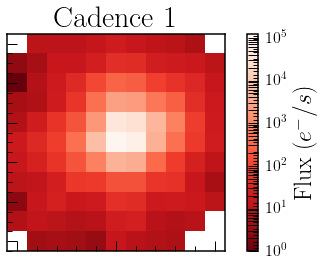

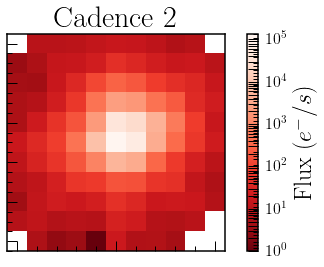

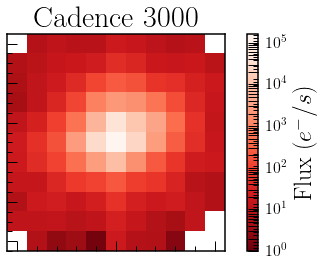

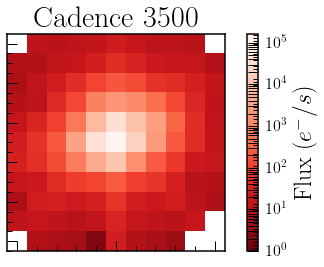

In [106]:
indices = [1,2,3000, 3500]

cmap = 'Reds_r'

for ind in indices:
    fig, ax = subplots(1,1, figsize=(8,4))
    norm = LogNorm(vmin=1, vmax=np.nanmax(flux[ind]))
    im = ax.imshow(flux[ind], interpolation='None', cmap=cmap, norm=norm)
    ax.tick_params(labelbottom='off') 
    ax.tick_params(labelleft='off') 
    cbar = fig.colorbar(im, ax=ax)
    ax.set_title('Cadence %i' % ind, fontsize=30)
    cbar.ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=24)
    #cbar.set_ticks([])




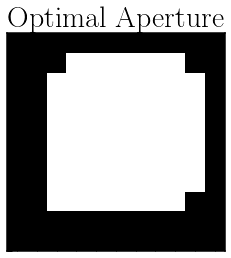

In [107]:
cmap = 'Greys_r'
fig, ax = subplots(1,1, figsize=(8,4))
aperture_ = aperture[::]
aperture_[aperture_ < np.max(aperture)] = 0
im = ax.imshow(aperture, interpolation='None', cmap=cmap)
ax.set_title('Optimal Aperture', fontsize=30)
ax.tick_params(labelbottom='off') 
ax.tick_params(labelleft='off') 

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  3.  3.  3.  3.  3.  0.  0.]
 [ 0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  0.]
 [ 0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  0.]
 [ 0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  0.]
 [ 0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  0.]
 [ 0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  0.]
 [ 0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  0.]
 [ 0.  0.  3.  3.  3.  3.  3.  3.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


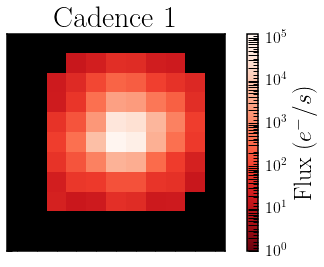

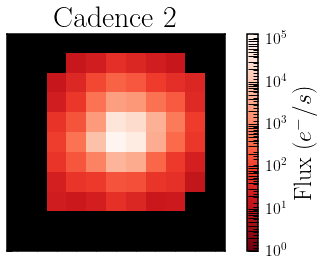

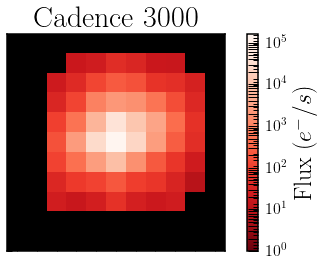

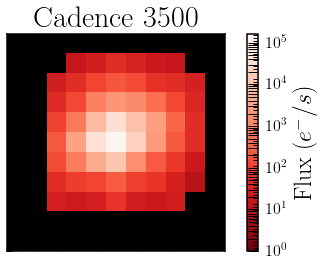

In [108]:
indices = [1,2,3000, 3500]
import matplotlib

ap = aperture_[::].astype(np.float)
print ap
ap[ap > 0] = np.nan

for ind in indices:
    fig, ax = subplots(1,1, figsize=(8,4))
    norm = LogNorm(vmin=1, vmax=np.nanmax(flux[ind]))
    cmap = 'Reds_r'

    im = ax.imshow(flux[ind], interpolation='None', cmap=cmap, norm=norm)
    cmap = matplotlib.cm.Greys_r
    cmap.set_bad('w',alpha=0.0)
    #cmap = 'Greys_r'
    
    ax.imshow(ap, interpolation='None', cmap=cmap)
    ax.tick_params(labelbottom='off') 
    ax.tick_params(labelleft='off') 
    cbar = fig.colorbar(im, ax=ax)
    ax.set_title('Cadence %i' % ind, fontsize=30)
    cbar.ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=24)
    #cbar.set_ticks([])


[[False False False False False False False False False False False]
 [False False False  True  True  True  True  True  True False False]
 [False False  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True  True False]
 [False False  True  True  True  True  True  True  True False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]]


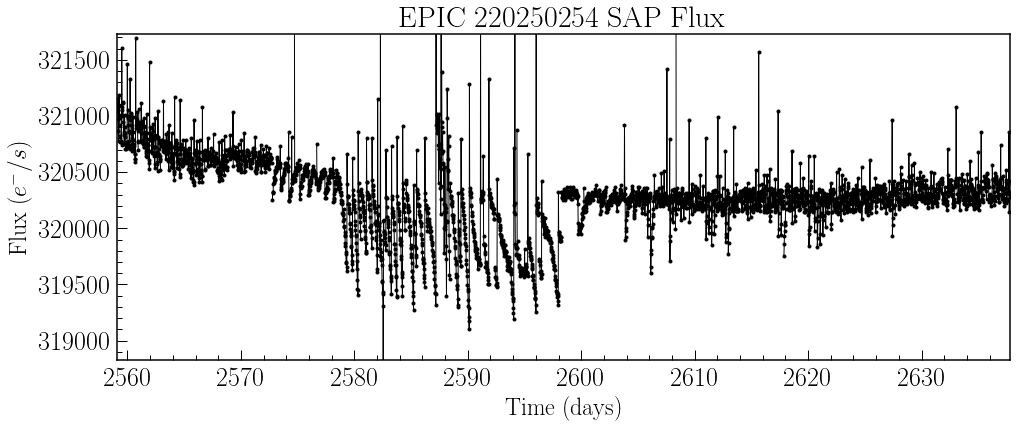

In [109]:
fig, ax = subplots(1,1, figsize=(16,6))
aperture_ = aperture[::]
aperture_[aperture_ < np.max(aperture)] = 0
aperture_[aperture_ > 0] = 1
aperture_ = aperture_.astype(np.bool)
print aperture_
lc = np.nansum(flux[:,aperture_], axis=1)
m = np.nanmean(lc)
s = np.nanstd(lc)
lc[(lc < m - 1*s) | (lc > m + 1*s)] = np.nan

ax.plot(t, lc, ls=' ', marker='.', color='k')
ax.plot(t, lc, ls='-', lw=1, color='k')

ax.set_title('EPIC %i SAP Flux' % EPIC, fontsize=30)
ax.set_xlabel('Time (days)', fontsize=24)
ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=24)

m = np.nanmean(lc)
s = np.nanstd(lc)
ax.set_ylim(m-3*s, m+3*s)
ax.set_xlim(t[0], t[-1])
set_tick_sizes(ax)


(2560.7031104089692, 2637.7511111487111)

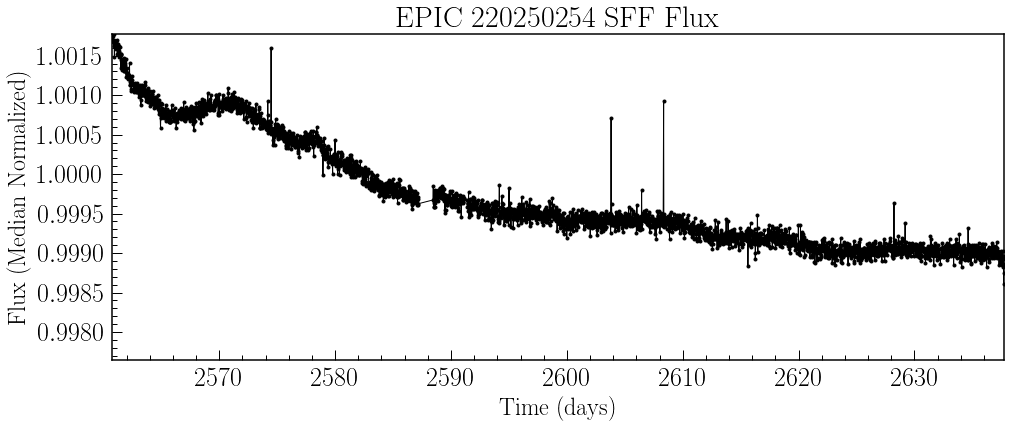

In [112]:
fig, ax = subplots(1,1, figsize=(16,6))

url = get_vj_url(EPIC, 8)
hdu = next(fits_downloader([url]))

lc = hdu[1].data['FCOR']
t = hdu[1].data['T']

m = np.nanmean(lc)
s = np.nanstd(lc)
lc[(lc < m - 3*s) | (lc > m + 3*s)] = np.nan

ax.plot(t, lc, ls=' ', marker='.', color='k')
ax.plot(t, lc, ls='-', lw=1, color='k')

ax.set_title('EPIC %i SFF Flux' % EPIC, fontsize=30)
ax.set_xlabel('Time (days)', fontsize=24)
ax.set_ylabel('Flux (Median Normalized)', fontsize=24)

set_tick_sizes(ax)

m = np.nanmean(lc)
s = np.nanstd(lc)
ax.set_ylim(m-3*s, m+3*s)
ax.set_xlim(t[0], t[-1])


In [ ]:
# Generating the correction explaination figure

/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


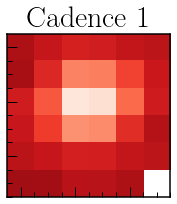

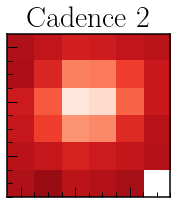

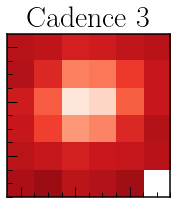

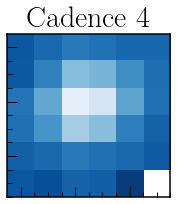

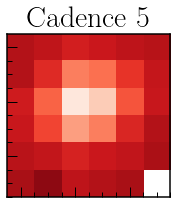

In [181]:
# select a target pixel image at a cadence
indices = [1,2,3,4,5]
step=2
for ind in indices:
    cmap = 'Reds_r'
    if ind == 4:
        cmap = 'Blues_r'
    fig, ax = subplots(1,1, figsize=(3,3))
    tmp_img = np.array([[np.nanmean(flux[ind,i:i+step, j:j+step]) for j in xrange(0, flux.shape[2], step)] for i in xrange(0, flux.shape[1], step)])
    norm = LogNorm(vmin=1, vmax=np.nanmax(flux[ind]))
    im = ax.imshow(tmp_img, interpolation='None', cmap=cmap, norm=norm)
    ax.tick_params(labelbottom='off') 
    ax.tick_params(labelleft='off') 

    ax.set_title('Cadence %i' % ind, fontsize=30)


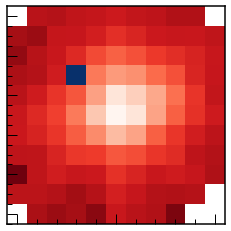

In [167]:
# Select a pixel at that cadence
ind = 4
ap = np.empty(aperture.shape, dtype=np.bool)
ap[::] = False
ap[3,3] = True
f = np.empty(flux[ind].shape)
f[::] = flux[ind]
f[~ap] = np.nan
pixel = flux[ind,3,3]


fig, ax = subplots(1,1, figsize=(8,4))
norm = LogNorm(vmin=1, vmax=np.nanmax(flux[ind]))
cmap = 'Reds_r'

im = ax.imshow(flux[ind], interpolation='None', cmap=cmap, norm=norm)
cmap = matplotlib.cm.Blues_r
cmap.set_bad('w',alpha=0.0)

ax.imshow(f, interpolation='None', cmap=cmap)
ax.tick_params(labelbottom='off') 
ax.tick_params(labelleft='off')

#cbar.set_ticks([])


In [122]:
# Show Pixel Relative location on percentile plot
pixmapfile = '../data/PixelMaps/Storage/PixelMaps/K2_target_pixels.hdf5'
try:
    cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
except:
        cont = PixelMapContainer(ccd, bar=None)
        cont.save(pixmapfile, doc='Pixel values are represented by the \'FLUX\' data column of the K2 target pixel files')

gen = PixMapGenerator(cont, cache=False)

  Writing... (Do Not Turn off Device or Stop Kernel)

[##############################-.............................] Estimating...    



In [171]:
cadence = gen.get_unordered(ind)
cadence = cadence[cadence > 0]
percentiles = np.arange(0,102,2)
bin_edges = np.percentile(cadence, percentiles)

70.7317073171


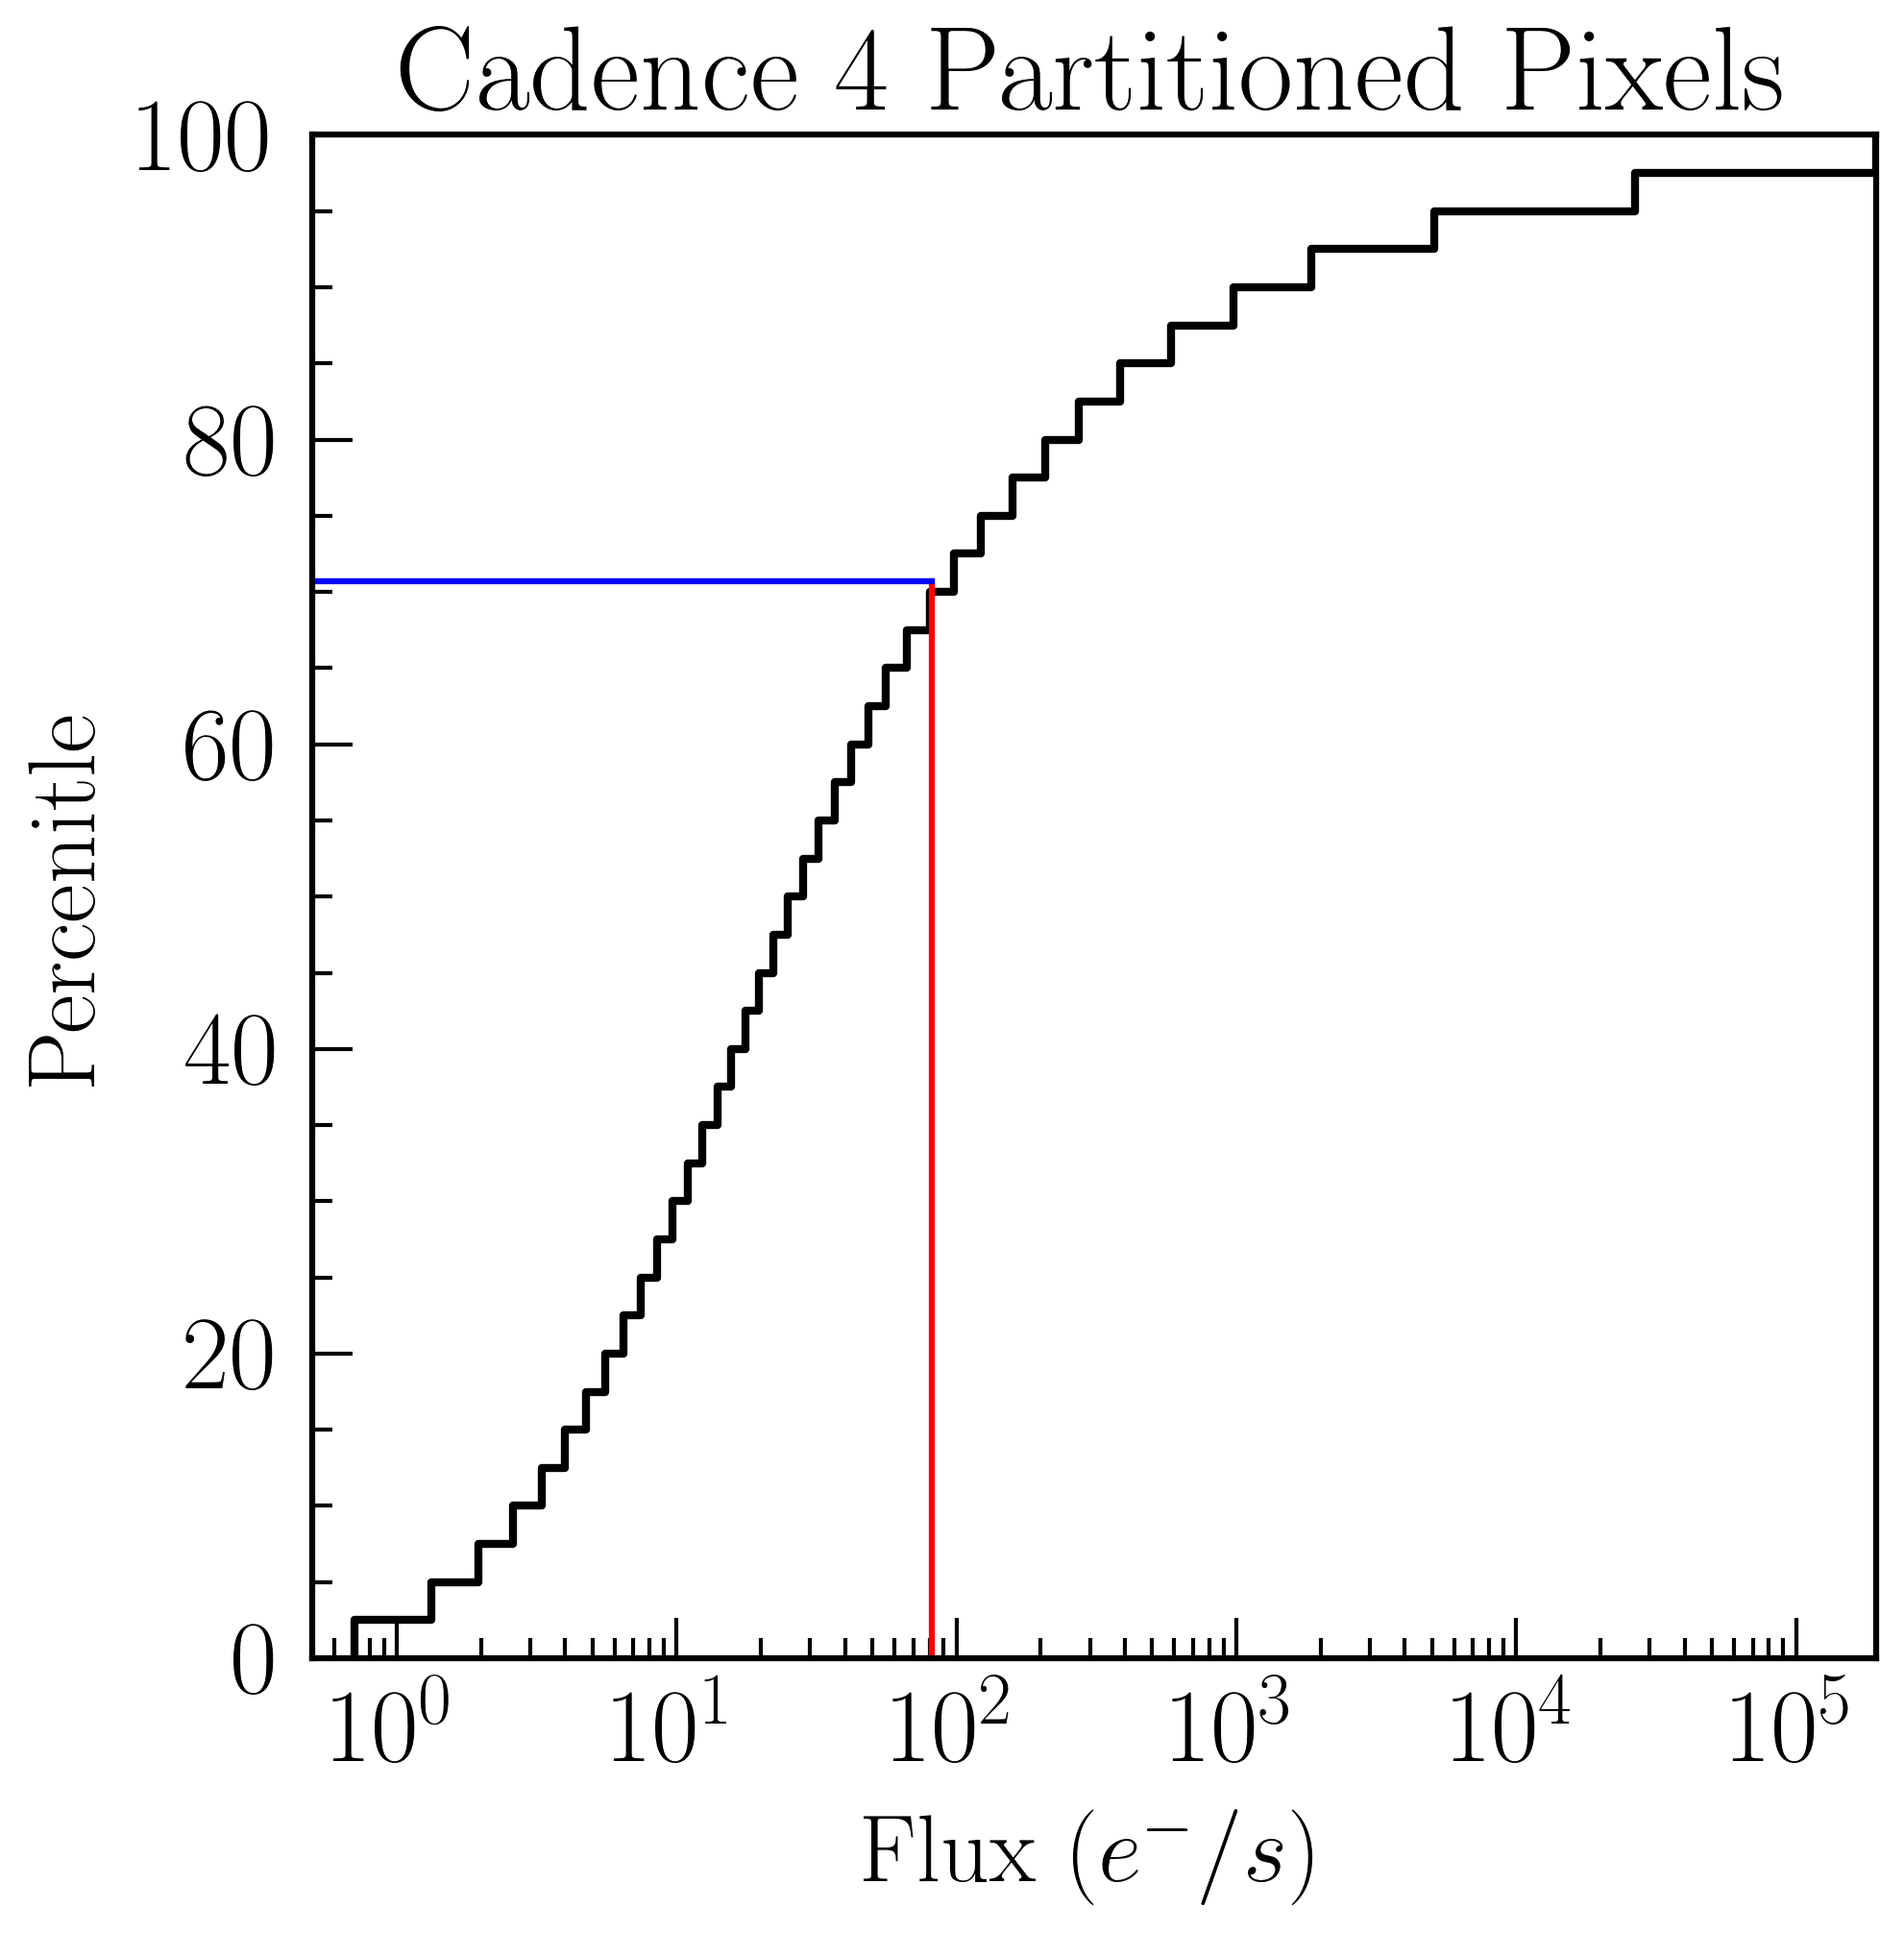

In [185]:
fig, ax = subplots(1,1, figsize=(7,7), dpi=300)
steps = (percentiles[1:]+percentiles[:-1])/2
steps = np.array(zip(percentiles[:-1], percentiles[1:])).ravel()
edges = np.array(zip(bin_edges[1:], bin_edges[1:])).ravel()
ax.plot(edges, steps, color='k', lw=2)
ax.set_xscale('log')
ax.set_xlabel('Flux $(e^{-}/s)$', fontsize=24)
ax.set_ylabel('Percenitle', fontsize=24)
ax.set_title("Cadence 4 Partitioned Pixels", fontsize=30)
pos = np.digitize(pixel, bin_edges)*100.0/len(bin_edges)
print pos
ax.plot([pixel, pixel],[0, pos], color='r')
ax.plot([0.0001,pixel],[pos,pos], color='b')
ax.set_xlim(0.5, np.max(edges))
ax.set_ylim(0,100)
set_tick_sizes(ax)


In [186]:
bin_inds = np.digitize(cadence, bin_edges)

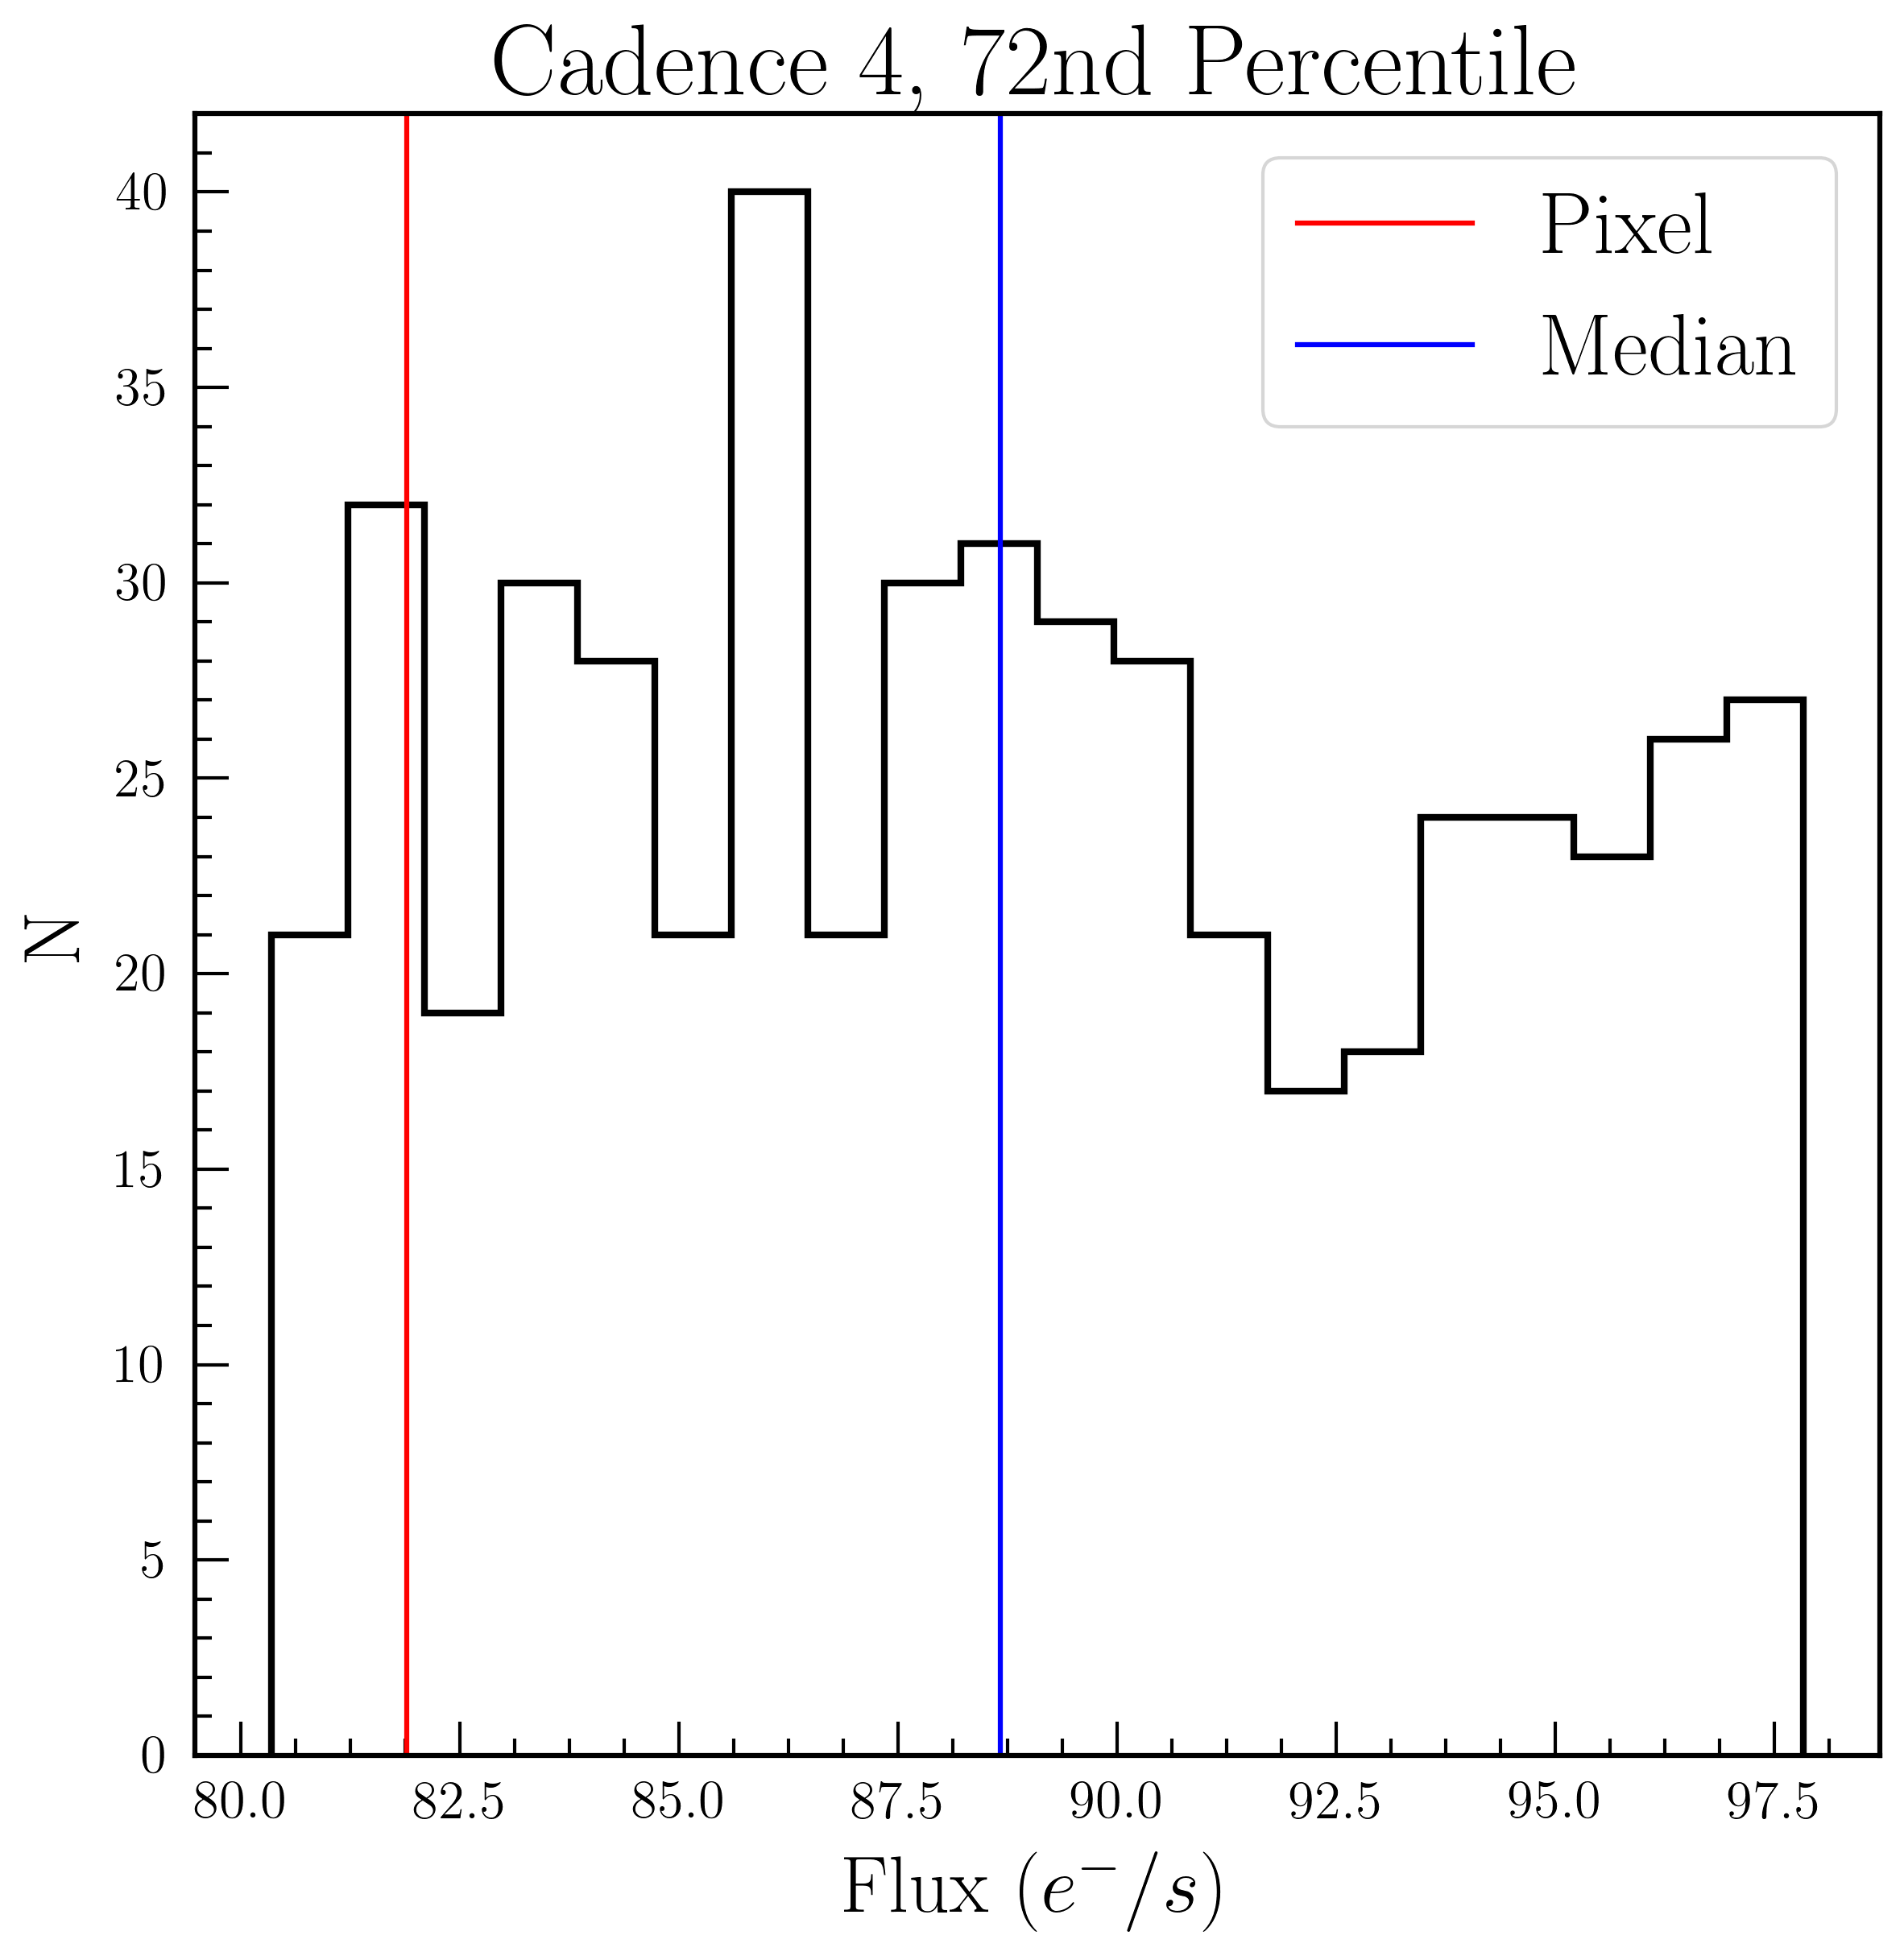

In [200]:
fig, ax = subplots(1,1, figsize=(9,9), dpi=300)
pos = np.digitize(pixel, bin_edges)
nearby = cadence[bin_inds == pos]
ax.hist(nearby, bins=20, histtype='step', color='k', lw=2)

ax.set_title('Cadence %i, %ind Percentile' % (ind-1, percentiles[pos]), fontsize=30)
ax.set_xlabel('Flux $(e^{-}/s)$', fontsize=24)
ax.set_ylabel('N', fontsize=24)
ax.axvline(pixel, color='r', label='Pixel')
ax.axvline(np.nanmedian(nearby), color='b', label='Median')
ax.legend(ncol=1, fontsize=26)
